## Forecasts and Prediction

### Sprint Project

#### by _Vadim Fridman_

### Step 0. Intro and table of content

#### Table of contents

0. [Step 0. Intro and table of content](#introduction)


1. [Step 1. Prepare the data](#part1)
    - [Step 1: Conclusion](#introduction1)
    
2. [Step 2. Carry out exploratory data analysis](#part2)
    - [Step 2: Conclusion](#step2)  
    
3. [Step 3. Build a model to predict user churn](#part3)
    - [Step 3: Conclusion](#part31) 
    
4. [Step 4. Create user clusters](#part4)
    - [Step 4: Conclusion](#part41) 
    
5. [Step 5. Come up with conclusions and basic recommendations on working with customers](#part5) 

####  Intro

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you?

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. In this project we are going to: 

* Learn to predict the probability of churn (for the upcoming month) for each customer
* Draw up typical user portraits: select the most outstanding groups and describe their main features
* Analyze the factors that impact churn most
* Draw basic conclusions and develop recommendations on how to improve customer service:
* Identify target groups
* Suggest measures to cut churn
* Describe any other patterns you see with respect to interaction with customers


### Step 1. Download the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    df = pd.read_csv('gym_churn_us.csv')
except:
     df = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3766,1,1,1,1,1,12,0,31,115.735523,11.0,1,1.704852,1.769573,0
3142,0,0,1,0,1,12,0,20,12.668363,12.0,1,1.822603,2.046784,1
1985,1,1,1,1,1,1,0,31,82.584162,1.0,8,2.053784,1.915962,0
3804,1,1,1,1,1,1,0,36,210.079025,1.0,3,2.273009,2.265810,0
3855,1,1,1,1,1,12,0,28,64.642913,12.0,1,2.555142,2.402152,0
914,0,1,0,0,1,1,0,24,149.858635,1.0,3,2.192316,1.255207,1
651,1,1,1,0,1,1,1,31,122.979894,1.0,7,0.428686,0.359863,0
2311,0,1,0,0,1,1,0,29,20.076299,1.0,0,1.632647,1.988690,1
1118,1,1,0,0,1,1,0,30,41.767164,1.0,1,1.523790,1.392351,1
370,1,1,1,1,0,1,0,30,167.880902,1.0,1,2.759734,2.527020,1


We are going to rename columns in accord with Style Guide for Python Code and optimize the memory usage a bit, i.e. there is no sense to use 64 bits to store 1 or 0, as well as there is no sense to store the column "Month_to_end_contract" as floats. 

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.month_to_end_contract.max()

12.0

In [8]:
df.month_to_end_contract = df.month_to_end_contract.astype('int8')

In [9]:
df.gender = df.gender.astype('int8')
df.near_location = df.near_location.astype('int8')
df.partner = df.partner.astype('int8')
df.promo_friends = df.promo_friends.astype('int8')
df.age = df.age.astype('int8')
df.phone = df.phone.astype('int8')
df.contract_period = df.contract_period.astype('int8')
df.group_visits = df.group_visits.astype('int8')
df.lifetime = df.lifetime.astype('int8')
df.churn = df.churn.astype('int8')
df.month_to_end_contract = df.month_to_end_contract.astype('int8')

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int8
near_location                        4000 non-null int8
partner                              4000 non-null int8
promo_friends                        4000 non-null int8
phone                                4000 non-null int8
contract_period                      4000 non-null int8
group_visits                         4000 non-null int8
age                                  4000 non-null int8
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null int8
lifetime                             4000 non-null int8
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int8
dtypes: float64(3), int8(11)
memory usage: 136.8 KB


Almost 70% less memory usage (437.6 KB -> 136.8 KB) to store the same amount of information is quite impressive, huh?  

In [11]:
df.duplicated().sum()

0

In [12]:
df.tail()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12,1,1.101832,1.035270,0


### Step 1. Conclusion
<a class="anchor" id="part11"></a>

In this tiny step we just imported data to Jupiter Notebook, renamed the columns, checked if we have duplicates and optimized the memory usage. 

## Step 2. Carry out exploratory data analysis
<a class="anchor" id="part2"></a>

__Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).__

As we can notice in the output of _.info()_ method above, there is no missing values in our dataset. 

In [13]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


The output is very interesting: we can see in the table a lot of useful information about clients of fitness club. So, i.e. men/women ratio is around 50/50. Most of the customers (ca. 85%) live or work near a club and so on. 

It is striking to see that the oldest client is 41 year old. In contrast 18 as a minimal age seems to be logical. As well as logical is the fact, that all the binary values has standart deviation less than 0.5 

For our project is also important to notice, that the mean of churn value is 0.26. It seems to be really high value, if monthly every fourth client cancels the contract. 

But the standart deviation value 0.44 says, that the churn rate is probably a bit lower than 0.26. 

__Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).__

In [14]:
pd.set_option("display.max_rows", 105, "display.max_columns", 20)
df.groupby('churn').describe().transpose()

churn                                              0            1
gender                            count  2939.000000  1061.000000
                                  mean      0.510037     0.510839
                                  std       0.499984     0.500118
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
near_location                     count  2939.000000  1061.000000
                                  mean      0.873086     0.768143
                                  std       0.332933     0.422217
                                  min       0.000000     0.000000
                                  25%       1.000000     1.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
partner                           count  2939.000000  1061.000000
                                  mean      0.534195     0.355325
                                  std       0.498914     0.478837
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       1.000000     0.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
promo_friends                     count  2939.000000  1061.000000
                                  mean      0.353522     0.183789
                                  std       0.478144     0.387495
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       0.000000     0.000000
                                  75%       1.000000     0.000000
                                  max       1.000000     1.000000
phone                             count  2939.000000  1061.000000
                                  mean      0.903709     0.902922
                                  std       0.295040     0.296204
                                  min       0.000000     0.000000
                                  25%       1.000000     1.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
contract_period                   count  2939.000000  1061.000000
                                  mean      5.747193     1.728558
                                  std       4.716942     2.132371
                                  min       1.000000     1.000000
                                  25%       1.000000     1.000000
                                  50%       6.000000     1.000000
                                  75%      12.000000     1.000000
                                  max      12.000000    12.000000
group_visits                      count  2939.000000  1061.000000
                                  mean      0.464103     0.268615
                                  std       0.498795     0.443448
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       0.000000     0.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
age                               count  2939.000000  1061.000000
                                  mean     29.976523    26.989632
                                  std       3.009933     2.895163
                                  min   

It is a very intersting question. 

We can claim, that the customers, who cancel/not renewed their contract their contracts: 

- are equally men and women (0.5100370.510839) (_hereinafter the first number describes mean value of customers, who continue exercising, the second one - the mean value of customers who cancel/not renewed their contracts_)
- more often does not live or work near a club (0.873086	0.768143)
- less often  originally signed up as an employee of a parner company (0.534195	 0.355325)
- less often originally signed up through a referal programm (0.353522	0.183789)
- equally often provided their phone number as customers, who continue exercising (0.903709	0.902922)
- mostly have short-term one-month long contracts (5.747193	1.728558)
- less often took part in the group sessions (0.464103	0.268615)
- are in average 3 years younger (29.976523	26.989632)
- spent less for additional services (158.445715	115.082899)
- as we've noticed above, have the short-term one month long contracts (4.711807	0.990575)
- showes up in the club in average around 1,5 times per month only (2.024876	1.474995)
- or even less (~1 time) during their last month (2.027882	1.044546)

After this analysis we are not sure if we need to build a machine learning model to answer the main projects questions (how to predict the probability of churn, draw up typical user portrait, analyze the factors that impact churn most etc.)
But it'd be also interesting to compare our analys and AI output.  :-) 

__Plot bar histograms and feature distributions for those who left (churn) and those who stayed.__

In [15]:
by_churn = df.groupby('churn', as_index=False).mean()
by_churn.reset_index()

,index,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


The task is not absolutly clear formulated. 

We are going to plot separat histograms for binary/non binary columns. (Otherwise it would look very strange if we mix up columns with real life and binary values.)

In [16]:
binary = [col for col in df.columns if df[col].nunique() <= 2]
len(binary)

7

In [17]:
def modifyChart(ax,
                columnLabel,
                labelSize,
                titleSize=False,
                maxs=False,
                xLabel='',
                yLabel=''):
    """
    Function that takes in graph variables for the purpose of customizing 
    their default settings (ie. setting label size)
    """
    if titleSize != False:
        ax.set_title(columnLabel,
                     fontsize=titleSize,
                     fontweight='semibold',
                     pad=10)
    else:
        ax.set_title(columnLabel)

    # spines
    sns.despine()
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('lightgrey')

    # labels
    ax.set_ylabel(yLabel, labelpad=5, fontsize=16)
    ax.set_xlabel(xLabel, labelpad=5, fontsize=16)

    # tick settings
    ax.tick_params(labelsize=labelSize)
    ax.tick_params(axis='both', left=False, bottom=False)
    ax.grid(axis='y', alpha=.4)

    # if a max value is passed
    if maxs:
        midCenterQuarter = (ax.get_yticks()[1] - ax.get_yticks()[0]) / 4  # to ensure that the tick labels don't overlap
        
        ax.set_ylim(0, maxs)  # set the yticks
        # keep all except last  tick - ensure that the ticks don't overlap
        # add the last tick value
        y_ticks = np.append(
            [i for i in ax.get_yticks() if i < (maxs - midCenterQuarter)],[maxs])
        # set the modified y ticks
        ax.set_yticks(y_ticks)

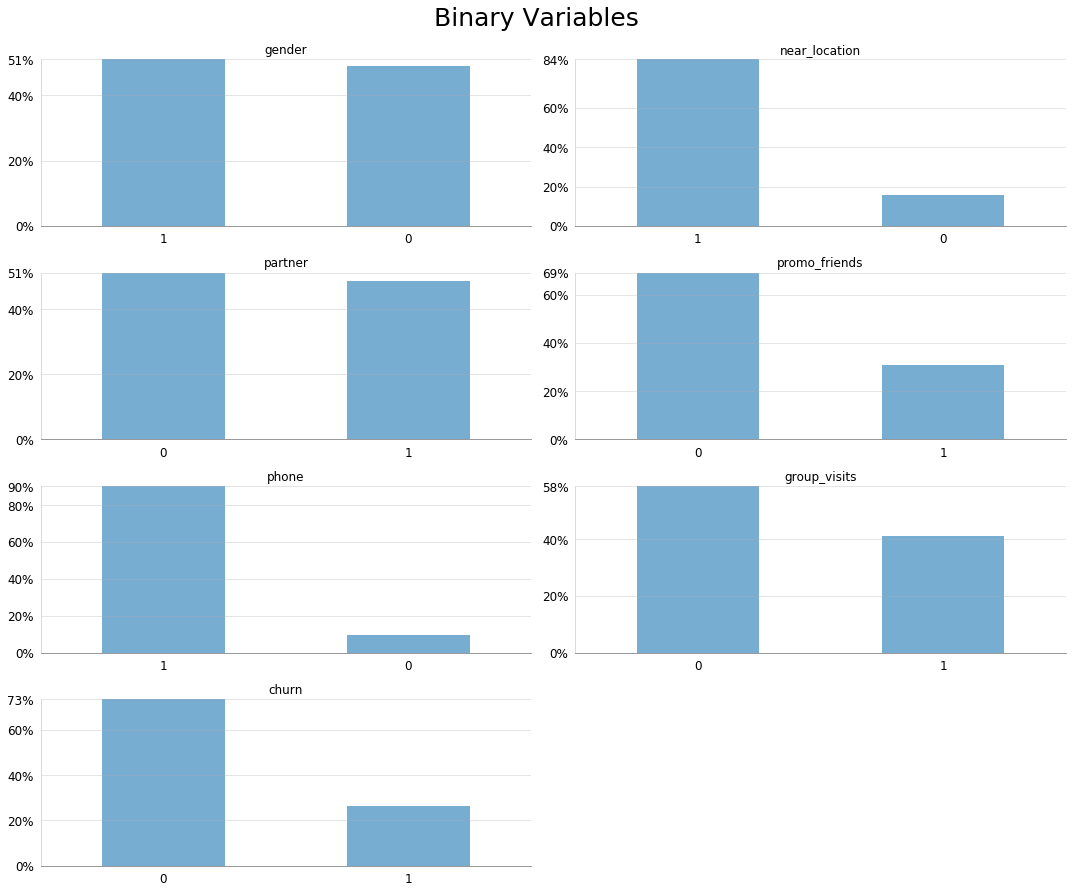

In [18]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=2, nrows=4)

axes = [(row, col) for row in range(4) for col in range(2)]

for col, i in zip(binary, axes):
    #unique values and their counts per column (normalized -> %)
    toChart = df[col].value_counts(normalize=True)
    #bar plot
    toChart.plot.bar(ax=ax[i], rot=0, alpha=.6)
    #calculate maximum value
    maxs = max(df[col].value_counts(normalize=True))
    #modify chart
    modifyChart(ax[i], col, 12, maxs=maxs)
    #set y tick values in % format
    ax[i].set_yticklabels(
        ["{}%".format(int(i * 100)) for i in ax[i].get_yticks()[:]])

#turn off the last chart value as it's empty
plt.suptitle('Binary Variables',fontsize=25,y=1.03)
ax[axes[-1]].axis('off')
plt.tight_layout()

What we can say about this graphs:

- ca. 58% of users take part in group sessions
- ca. 84% live or work near the neighborhood
- roughly 50% are an employees of a partner company
- ca. 1/3 signed up through a "bring a friend" referal offer
- churn rate ca. 25% as mentioned above seems to be really high


In addition, it looks like the phone variable will not be needed given it's overwhelming 1 relative value as well as it's low relevancy to the target variable.

We'll tolerate the location variables as it has > 15% of values placed in the least common unique value and might provided some useful info (it's expected that the closer the gym location, the less the churn rate).

In [19]:
df.drop(columns='phone',inplace=True)

And now we are going to visualize the non-binary variables using a distribution plot.

In [20]:
nonBinary = [col for col in df.columns if df[col].nunique() > 2]
len(nonBinary)

7

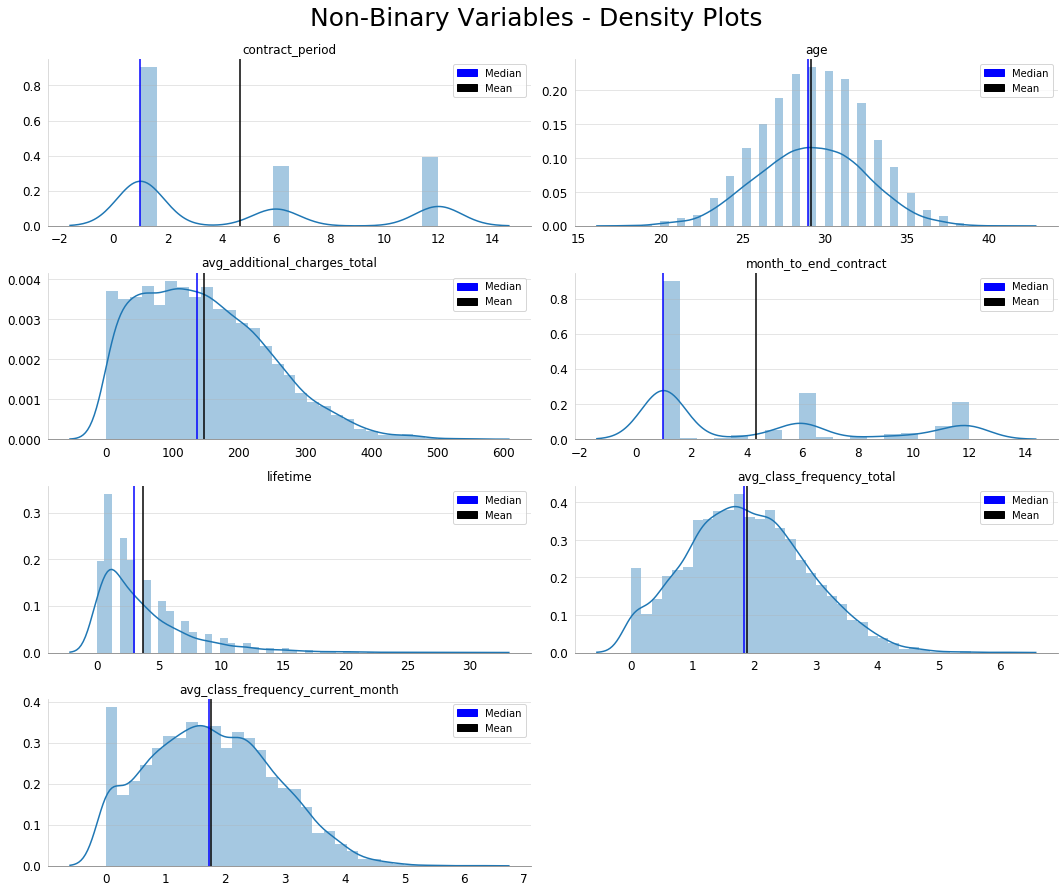

In [21]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=2, nrows=4)

axes = [(row, col) for row in range(4) for col in range(2)]

for col, i in zip(nonBinary, axes):
    sns.distplot(df[col], ax=ax[i])
    modifyChart(ax[i], col, 12)

    ax[i].axvline(df[col].median(), color='blue')
    ax[i].axvline(df[col].mean(), color='black')

    #referring to axes in order to use the pyplot module
    plt.sca(ax[i])
    #custom legend
    azure_patch = mpatches.Patch(color='blue', label='Median')
    orange_patch = mpatches.Patch(color='black', label='Mean')
    plt.legend(handles=[azure_patch, orange_patch])
plt.suptitle('Non-Binary Variables - Density Plots',fontsize=25,y=1.03)
plt.tight_layout()
ax[axes[-1]].axis('off');

Here we start seeing some interesting patterns. 

- a lot of customers are new customers: ca. the half of users are less then 4 month with the company (!)
- only very few users (ca. 10%) are customers for 1 year or more
- most of the users (over 80%) have one-month contract (seems to be pretty unusual for western countries)
- number of average weekly visits is very low (around 2 per week!)

Let's compare Churn vs No Churn Variables. 

In [22]:
toChart = df.groupby("churn").mean()

#how many columns and unique values
print(len(toChart.columns))
print(toChart.index)

12
Int64Index([0, 1], dtype='int64', name='churn')


In [23]:
toChart = toChart.rename(index={0:'No Churn',1:"Churn"})
toChart

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,
No Churn,0.510037,0.873086,0.534195,0.353522,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
Churn,0.510839,0.768143,0.355325,0.183789,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


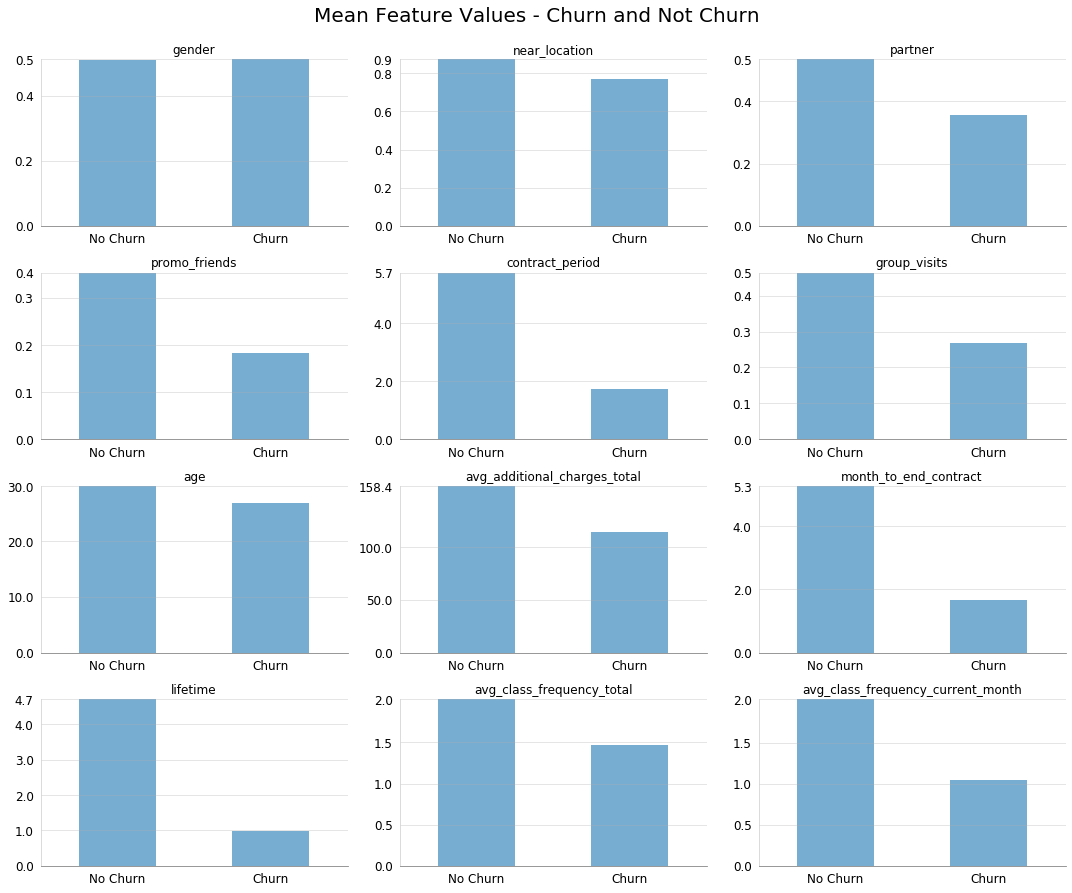

In [24]:
fig, ax = plt.subplots(figsize=(15, 12), ncols=3, nrows=4)
axes = [(row, col) for row in range(4) for col in range(3)]

for col, i in zip(toChart.columns, axes):
    toChart[col].plot.bar(ax=ax[i], rot=0, alpha=.6)

    maxs = max(toChart[col])
    modifyChart(ax[i], col, 12, maxs=maxs)

    ax[i].set_yticklabels(["{:.1f}".format(i) for i in ax[i].get_yticks()])

plt.suptitle("Mean Feature Values - Churn and Not Churn", fontsize=20, y=1.03)
plt.tight_layout()

Compared to no churn users, customers who cancel theit contracts:

- are less likely to be an employee from a partner company
- are less likely to enroll through a promotions program
- has a short-time contract
- are less likely to come to group visits
- spend less in additional charges
- visit the club rearly(in average 1-1.5 visits per month only)

__Build a correlation matrix and display it.__

Let's build a correlation matrix and plot the distribution graphs. 

In [25]:
corr = df.corr()
display(corr)

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
contract_period,0.000502,0.150233,0.306166,0.244552,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393
lifetime,0.013579,0.070921,0.061229,0.072721,0.170725,0.075853,0.164693,0.079028,0.161078,1.000000,0.112338,0.181975,-0.438220


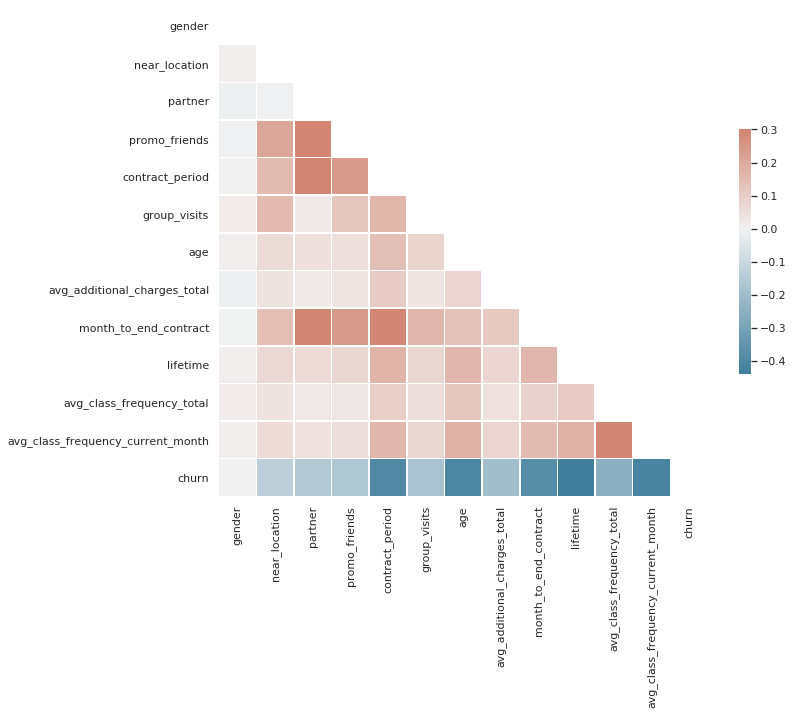

In [26]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

The matrix and the corresponding heatmap graph show that we have realtiv strong correlation (ca. ±0.4) btw. churn rate and following criterion: 

- avg_class_frequency_current_month
- lifetime
- age
- month_to_end_contract
- contract_period

So in summary:

- it seems that social factors, months with company (contract and lifetime), being an employee from a partner company and spending more in-store leads are good indicators for an employee churning or not.

This data are consistent with the conclusions we formulated earlier. 

### Step 2. Conclusion
<a class="anchor" id="step2"></a>

During this small step we checked, if we have any missing values in our dataset, plotted a few graphs and looked into correlation between the parameters in our dataset. 

Actually we already founded out, what kind of customers is more likely to quit the gym ( it's more likely be customers, who 

- not live or work near a club 
- not signed up as an employee of a parner company 
- not originally signed up through a referal programm
- has short-term one- or three-month long contracts 
- not took part in the group sessions 
- in average 3 years younger than othe customers
- paid less for additional services
- showed up in the club in average around 1,5 times per month only 
- or showed up in the club even less than 1.5 times during their last month) 

But we want compare this conclusions with the ML prediction we are going to build further. 

## Step 3: Analyze the data
<a class="anchor" id="part3"></a>

**Build a binary classification model for customers where the target feature is the user's leaving next month.**

**- Divide the data into train and validation sets using the _train_test_split()_ function.**

**- Train the model on the train set with two methods:**

   **- logistic regression**
        
   **- random forest**

We are going to perform it how we learned it during our theory course. 

First we divide the data into features (the X matrix) and a target variable (y).

In [27]:
X = df.drop('churn', axis = 1)
y = df['churn']

Second we divide the data into train and test sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Then we train StandardScaler on the train set. 

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

And standartize/transform train and test sets. 

In [30]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

The next steps: define the model's algorithm, train LR model, use the trained model to make forecasts. 

In [31]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test) 
probabilities_lr = model_lr.predict_proba(X_test) 

And the same three steps for the 2nd algorithm. 

In [32]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

model_rf.fit(X_train_st, y_train)

predictions_rf = model_rf.predict(X_test_st)  
probabilities_rf = model_rf.predict_proba(X_test_st)[:,1] 

**Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?**

The following function was given us in the theory part. It will also help us to check both models here. 

In [33]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    #print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    #print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [34]:
print_all_metrics(y_test, predictions_lr, probabilities_lr , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.82


In [35]:
print_all_metrics(y_test, predictions_rf, probabilities_rf, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


It's a bit complicated to analyze the output since we have very little expirience in the field, but the random forest algorythm seems deliver slightly better results at least in accuracy and precision metrics. 

### Step 3. Conclusion
<a class="anchor" id="step32"></a>

During this step we built and trained and validated two binary classifications model. Both showed good results, but in this case the random forest algorythm seemed to deliver slightly better results in accuracy and precision metrics compare to the linear regression. 

## Step 4. Create user clusters
<a class="anchor" id="part4"></a>

**Set aside the column with data on churn and identify object (user) clusters:**

**- Standardize the data.**

We already have valiable X and y, where the whole dataset without _churn_ column and the _churn_ column only saved.

Thus we can do the the obligatory standardization of data before passing it to the algorithm. 

In [36]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

**Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.**

In [37]:
linked = linkage(x_sc, method = 'ward') 

Caution! Building the following graph can take up to 5-10 minutes! 

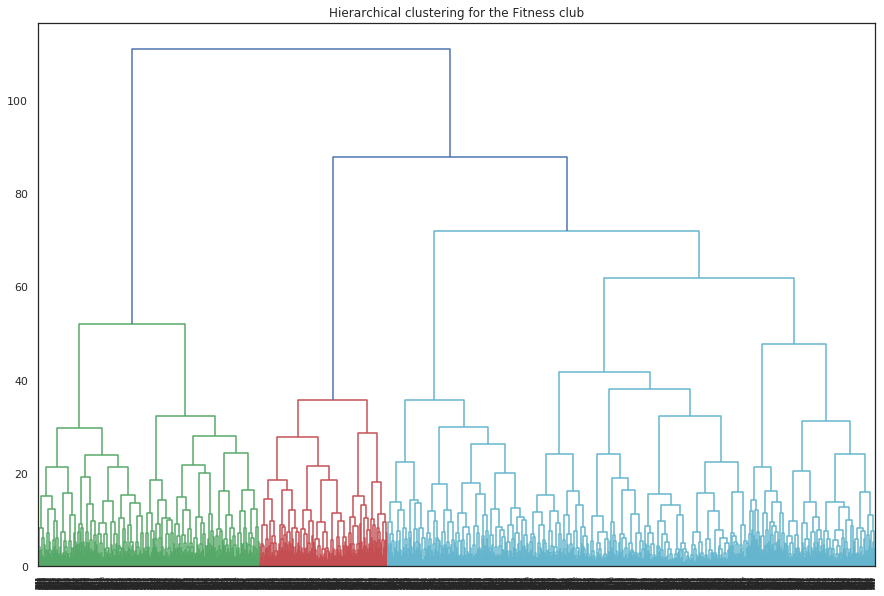

In [38]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for the Fitness club')
plt.show() 

As mentioned above, it's a bit complicated to analyze the output since we have very little expirience in the field. 

**Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)**

We define the k_means model with 5 clusters and predict the clusters for observations.

In [39]:
km = KMeans(n_clusters = 5)

labels = km.fit_predict(x_sc)

**Look at the mean feature values for clusters. Does anything catch your eye?**

Let's store cluster labels in the field of our dataset and print the statistics of the mean feature values per cluster. 

In [40]:
df['cluster_km'] = labels

mean_paired = df.groupby('cluster_km').mean()
mean_paired

,gender,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,
0,0.596817,0.972149,0.269231,0.100796,2.884615,0.486737,30.232095,162.643149,2.647215,5.141910,2.909836,2.911668,0.063660
1,0.485179,0.998440,0.817473,1.000000,3.143526,0.455538,29.182527,141.147858,2.906396,3.672387,1.720163,1.612149,0.249610
2,0.495413,0.000000,0.466055,0.077064,2.207339,0.214679,28.477064,133.894588,2.071560,2.798165,1.660876,1.470310,0.449541
3,0.501071,0.944325,0.739829,0.487152,11.890792,0.551392,29.904711,164.799347,10.888651,4.701285,1.989411,1.980812,0.022484
4,0.481350,1.000000,0.244227,0.017762,1.976909,0.317940,28.228242,131.235399,1.894316,2.444050,1.293207,1.055083,0.521314


0 and 4 seems to have the lowest chance of churning. 

Let's check a silhouette score for our clusters. 

In [41]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.14


More likely than not, users in clusters have some overlapping features. Plotting mean feature values to get a better view of the clusters.

**Plot distributions of features for the clusters. Do you notice anything?**

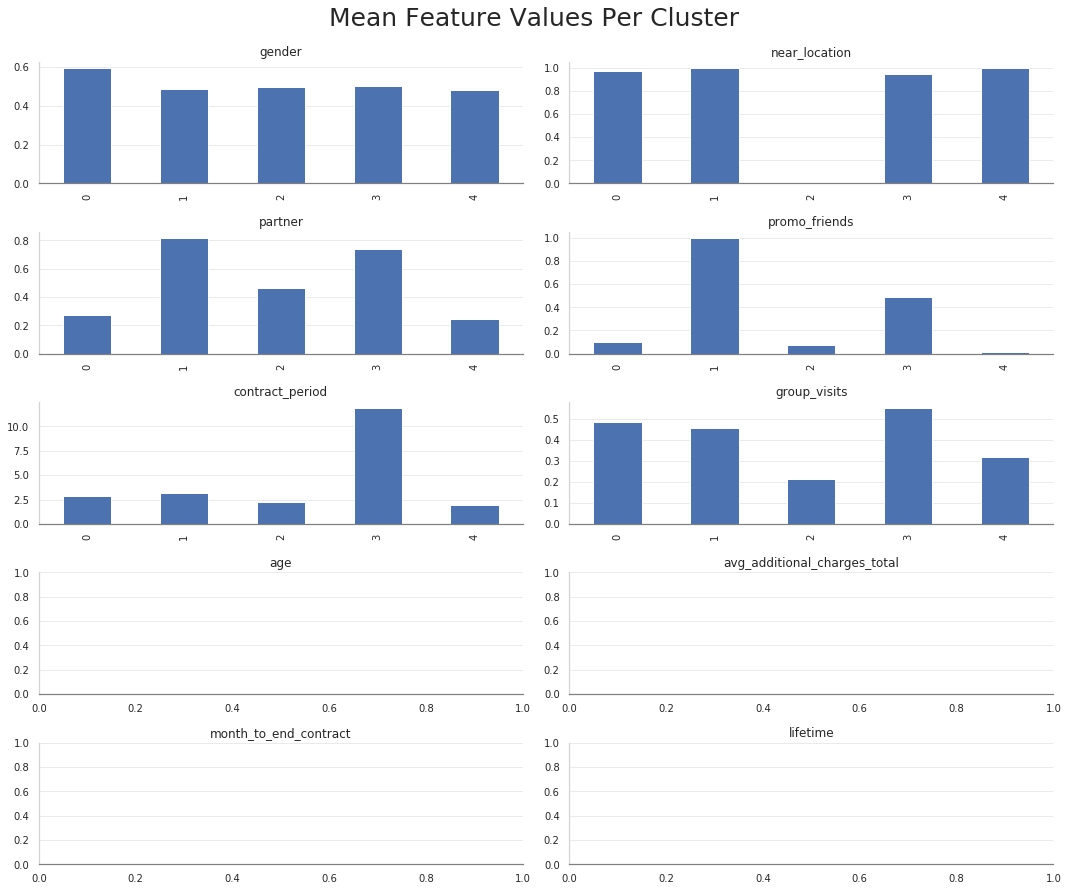

In [42]:
# mean feature values for clusters.
fig, ax = plt.subplots(figsize=(15, 12), ncols=2, nrows=5)
axes = [(row, col) for row in range(5) for col in range(2)]

for col, i in zip(df.drop('churn', axis=1).columns, axes):
    # groupby feature ignored
    if 'cluster_km' in col:
        continue

    # to check if  one unqie value in grouped columns
    check = list(df.groupby('cluster_km').agg({col: 'nunique'}).values)
    # if so or if unique columns  values are less than 3
    if 1 in check or df[col].nunique() <= 3:
        # than bar plot
        df.groupby('cluster_km').agg({ col: 'mean' }).plot.bar(ax=ax[i], legend=False)
        modifyChart(ax[i], col, 10)
        continue

    # else create a facet grid to display mutliple  distribution plots within one graph
    g = sns.FacetGrid(data=df, hue='cluster_km')
    g.map(sns.distplot, col, hist=False, rug=True, ax=ax[i])

    # chart modifications
    [ax[i].spines[spine].set_visible(False) for spine in ['top', 'right']]
    modifyChart(ax[i], col, 10)
    plt.close()
plt.suptitle("Mean Feature Values Per Cluster",fontsize=25,y=1.03)
#ax[axes[-1]].axis('off')
plt.tight_layout()

We can see, that gender and  phone data are not really relevant for our clustering. 

Cluster 1 has the most amount of the customers, who work in the partner companies and those, who became a customer through the refarall program. Thus this cluster has the highest share of customers with long-term contracts (8 month in average). 

Cluster 4 are the customers, who does not live or have a job near the club. 

In general this clustering does not seem to be very useful since we don't know the exact criterion was used to build clusters. 

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**

We'll plot a graph to better see the difference between the churn rate of clusters. 

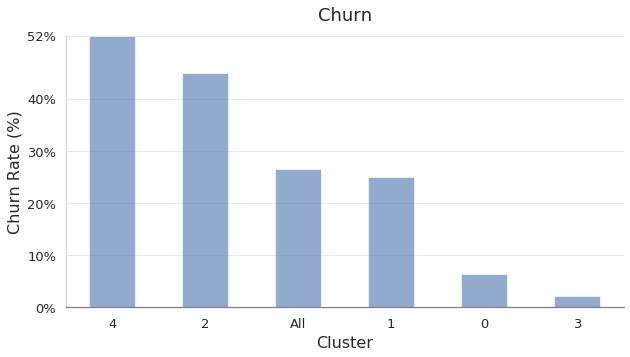

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
#chart with added series for the purposes of diplaying a bar showing aggregate churn rate
df.groupby('cluster_km').agg({
    'churn': 'mean'
}).append(pd.Series(df['churn'].mean(), index=('churn', ),
                    name='All')).sort_values(
                        'churn', ascending=False).plot.bar(ax=ax,
                                                           alpha=.6,
                                                           rot=0,
                                                           legend=False)

maxs = max([category.get_height() for category in ax.patches])
modifyChart(ax, col, 13, maxs=maxs, xLabel='Cluster', yLabel='Churn Rate (%)')

ax.set_yticklabels(["{}%".format(int(i * 100)) for i in ax.get_yticks()[:]])
ax.set_title('Churn', fontsize=18, pad=15)
plt.show()

Clusters 3, 4 and 3 tend to cancel their contracts. The club have to pay more attention to this customers. 

Clusters 0 and 1  have the below average churn rate. 

## Step 5. Come up with conclusions and basic recommendations on working with customers
<a class="anchor" id="part5"></a>

Based on the previous findings as well as some external reports, here are some recommendations for improving customer retention and churn:

1. The first problem that the clubs has is the prevalence of short-term contracts. This type of contracts hprovides the highest churn rate. The clus has to concider an option to offer special condition for long term contracts to make them more attractive. 

2. Company should place an emphasis on fostering group interaction activities such as group classes. This is especially the case for the customer profile seen earlier(average age 29) since according to fitness reports, studies are showing the effectiveness of group classes in improving retention rate for fitness studios for those in the younger generation.

3. Create or improve stronger relationships with users who identified as having high chances of churning (not coming from partner company or referal programm, younger, seldom shows up in the club etc.). It could be i.e. lower prices or special offers for young customers or for customers, who visits the clubs less than 5 times per month etc. 


Unfortunatly we couldn't really compare the our сonclusions we made during EDA stage with data we got using ML models since clustering took place as black box and we doesn't know the exact criterion of clusterization. 